<a href="https://www.kaggle.com/code/mikemiller117/codecadamy-final-project-data-analysis?scriptVersionId=131151095" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Arabica Coffee Exploration

* [Introduction](#intro)
    * [Background](#background)
    * [Goals](#goals)
* [Data](#data)
    * [Import Python Modules](#libraries)
    * [Understanding the Data](#data_info)
* [Comparing Varities to Cupping Score](#varities_cupping)
    * [Clean Data](#clean_data)
    * [Observations](#var_obser)
* [Comparing Altitude to Total Cup Score](#alt_score)
    * [Examining Data](#alt_score_eda)

## Introduction <a class="anchor" id="intro"></a>

### Background <a class="anchor" id="background"></a>

In the past few years, I have become more interested in coffee. I have thought about how Q-grade affects the price of coffee. However, a more foundational questions deals with how a coffee will score first before it is priced. A Q-grader evaluates the coffee during a process called cupping. The cupping process allows the grader to compare different coffees together. They brew each coffee with the same amount of coffee and water. Specialty Coffee Assocation (SCA) provides the [protocols](https://sca.coffee/research/protocols-best-practices) for cupping an evaluating coffee. Coffees are graded on "Fragrance/Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Uniformity, Clean Cup, Sweetness, Defects, and Overall" (Source: SCA). The graders assign a number between 6-10 using quarter point incriments.

### Goals <a class="anchor" id="goals"></a>

I want to discover the connection between cupping score and alititude and also discover if variety affects the score at different alititudes. Here is the order of questions to discover or connect.

1. Clean data as needed for analysis

2. Compare `Total.Cup.Points` with `variety`

3. Compare `Total.Cup.Points` with `altitude_mean_meters`

4. Determine if `altitude_mean_meters` and `variety` effect `Total.Cup.Points`.

## Data <a class="anchor" id="data"></a>

I have choosen to use the clean data from the data set uploaded to [Kaggle](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). This data comes from James LeDoux [GitHub](https://github.com/jldbc/coffee-quality-database/tree/master/data) repositiary. He scrapped the data from Coffee Quality Institue [database](https://database.coffeeinstitute.org/) in January 2018 then cleaned the data.

### Import Python Modules <a class="anchor" id="libraries"></a>

I have imported all the libraries need to accomplished this task. I also set some Pandas and MatPlotLib settings before moving to importing the data.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # create graphs
import seaborn as sns # create graphs
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-quality-database-from-cqi/merged_data_cleaned.csv
/kaggle/input/coffee-quality-database-from-cqi/arabica_data_cleaned.csv
/kaggle/input/coffee-quality-database-from-cqi/robusta_data_cleaned.csv


### Understanding the Data <a class="anchor" id="data_info"></a>

The Arabica coffee data contains 44 columns and 1311 rows. Of the 44 columns, we are only interested in a small number of columns, which are `Varitey`, `Total.Cup.Points`, and `altitude_mean_meters`. I used `altitude_mean_meters` instead of `Altitude` because there is clean up. Looking at the head, `Altitude` contains a hyphen and a letter which will have to be removed. The `Altitude` range matched the `altitude_low_meters` and `altitude_high_meters` columns. Looking at total NULL values, `altitude_mean_meters` only contain 4 more NULL values than `Altitude`. To conclude, it made more sense to use the `altitude_mean_meters` thought it will require more clean up. However, `unit_of_measure` contains two values: meters and feet. Since most of the records are meters, I will examine further if we need to clean heights. 

In [2]:
coffee_df = pd.read_csv("/kaggle/input/coffee-quality-database-from-cqi/arabica_data_cleaned.csv", index_col=0)

print(coffee_df.shape)

(1311, 43)


In [3]:
coffee_df.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [4]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 1 to 1312
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                1311 non-null   object 
 1   Owner                  1304 non-null   object 
 2   Country.of.Origin      1310 non-null   object 
 3   Farm.Name              955 non-null    object 
 4   Lot.Number             270 non-null    object 
 5   Mill                   1001 non-null   object 
 6   ICO.Number             1165 non-null   object 
 7   Company                1102 non-null   object 
 8   Altitude               1088 non-null   object 
 9   Region                 1254 non-null   object 
 10  Producer               1081 non-null   object 
 11  Number.of.Bags         1311 non-null   int64  
 12  Bag.Weight             1311 non-null   object 
 13  In.Country.Partner     1311 non-null   object 
 14  Harvest.Year           1264 non-null   object 
 15  Grad

In [5]:
coffee_df.describe()

,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1310.000000,1311.000000,1084.000000,1084.000000,1084.000000
mean,153.887872,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,9.833394,9.83312,9.903272,7.497864,82.115927,0.088863,0.426392,0.177099,3.591915,1759.548954,1808.843803,1784.196379
std,129.733734,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,0.559343,0.77135,0.530832,0.474610,3.515761,0.047957,1.832415,0.840583,5.350371,8767.847252,8767.187498,8767.016913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,14.500000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,175.000000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,90.580000,0.280000,31.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [6]:
print(coffee_df.isnull().sum())

Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 356
Lot.Number               1041
Mill                      310
ICO.Number                146
Company                   209
Altitude                  223
Region                     57
Producer                  230
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   201
Processing.Method         152
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers                     1
Color     

In [7]:
coffee_df.head()

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


## Comparing Varities to Cupping Score <a class="anchor" id="varities_cupping"></a>

### Cleaning Data <a class="anchor" id="clean_data"></a>

In order to anwser the first question, I copied `coffee_df` to keep `Variety` and `Total.Cup.Points`. From above, I noticed that `Total.Cup.Points` has at least one 0 value. I removed those entries since would mean.  

There are also null values for varieties. There are some varieties classified as other. Both values seem to indicate the same issue, they did not know the variety so some say other and some left it blank. Some countries, like Ethiopia, have heirloom coffees where varietial is unknown. 

There are some varieties than have a few entires so all varieties with less than 10 entries were removed. Next, I grouped all vareties with their average cupping scores. Finally, I used a boxplot to graph these varieties and arranged them from highest average cup score descending.

After plotting the boxplot, there were small amount of outliners beyond 70. Before removing the 5 point, the mean was 82.18. The mean raised to 82.26. I ploted the mean on the histograph to notice that the points are skrewed to the right. 

In [8]:
# Coping the needed columns: Varieties and total cup points
grade_variety = coffee_df[['Variety', 'Total.Cup.Points']].copy().rename(columns={'Total.Cup.Points': 'Total_Cup_Points'})

# Removing any Total Cup Points that equal zero.
grade_variety = grade_variety[grade_variety.Total_Cup_Points > 0].reset_index(drop=True).copy()

# Renaming the NULL values in Variety to "Other"
grade_variety.Variety = grade_variety.Variety.fillna('Other')

# Printing new minimium score
grade_variety.Total_Cup_Points.min()


59.83

In [9]:
variety_count = grade_variety['Total_Cup_Points'].groupby(grade_variety['Variety']).count().sort_values(ascending=False).copy()

variety_count

Variety
Other                    309
Caturra                  255
Bourbon                  226
Typica                   211
Catuai                    74
Hawaiian Kona             44
Yellow Bourbon            35
Mundo Novo                33
Catimor                   20
SL14                      17
SL28                      15
Pacas                     13
Gesha                     12
Pacamara                   8
SL34                       8
Peaberry                   5
Arusha                     5
Mandheling                 3
Sumatra                    3
Ethiopian Yirgacheffe      2
Blue Mountain              2
Ruiru 11                   2
Java                       2
Ethiopian Heirlooms        1
Moka Peaberry              1
Marigojipe                 1
Sulawesi                   1
Sumatra Lintong            1
Pache Comun                1
Name: Total_Cup_Points, dtype: int64

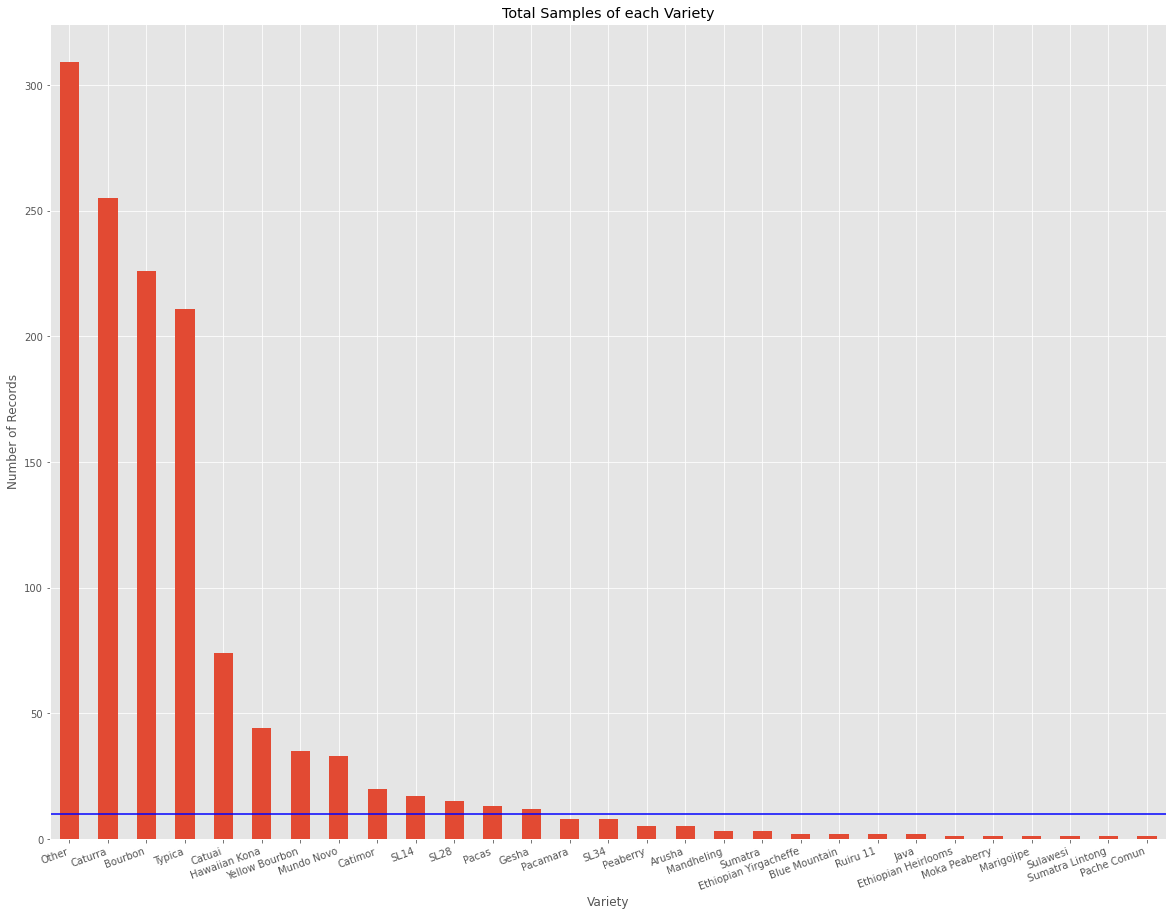

In [10]:
variety_count.plot(kind='bar', figsize=[20,15], title='Total Samples of each Variety', ylabel='Number of Records')
plt.axline(xy1=(0,10), slope=0, color='blue')
plt.xticks(ha='right', rotation=20)
plt.show()

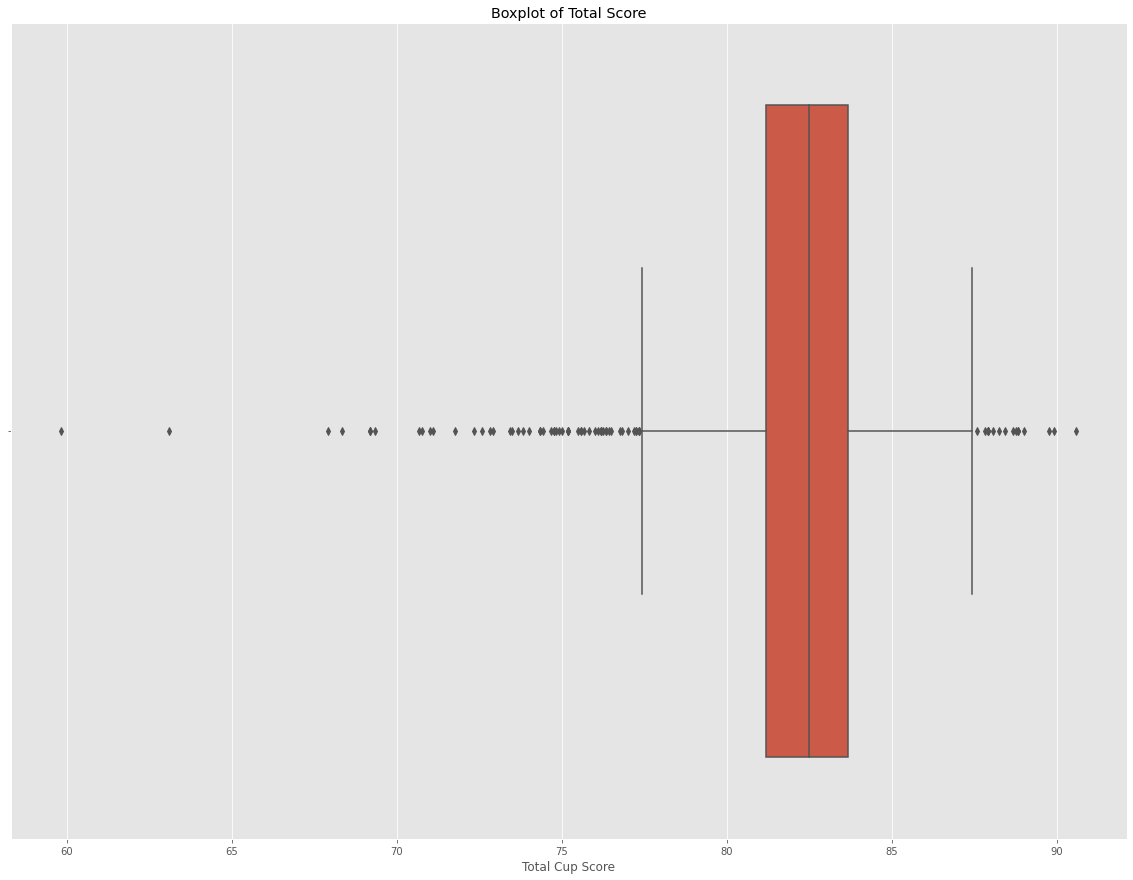

In [11]:
plt.figure(figsize=[20,15], facecolor='white')
sns.boxplot(x='Total_Cup_Points',data=grade_variety)
plt.title('Boxplot of Total Score')
plt.xlabel('Total Cup Score')
plt.show()

The following histograph shows the distrubtion of scores. 

In [12]:
grade_variety = grade_variety[grade_variety['Total_Cup_Points']>=70].reset_index(drop=True).copy()

In [13]:
# Calculate grade mean
grade_mean = grade_variety.Total_Cup_Points.mean()
print("The mean for Total Cup Point is " + str(round(grade_mean,2)))
grade_median = grade_variety.Total_Cup_Points.median()
print("The median for Total Cup Point is " + str(round(grade_median,2)))
grade_std = grade_variety.Total_Cup_Points.std()
print("The standard deviation for Total Cup Point is " + str(round(grade_std,2)) + " points")





The mean for Total Cup Point is 82.26
The median for Total Cup Point is 82.58
The standard deviation for Total Cup Point is 2.43 points


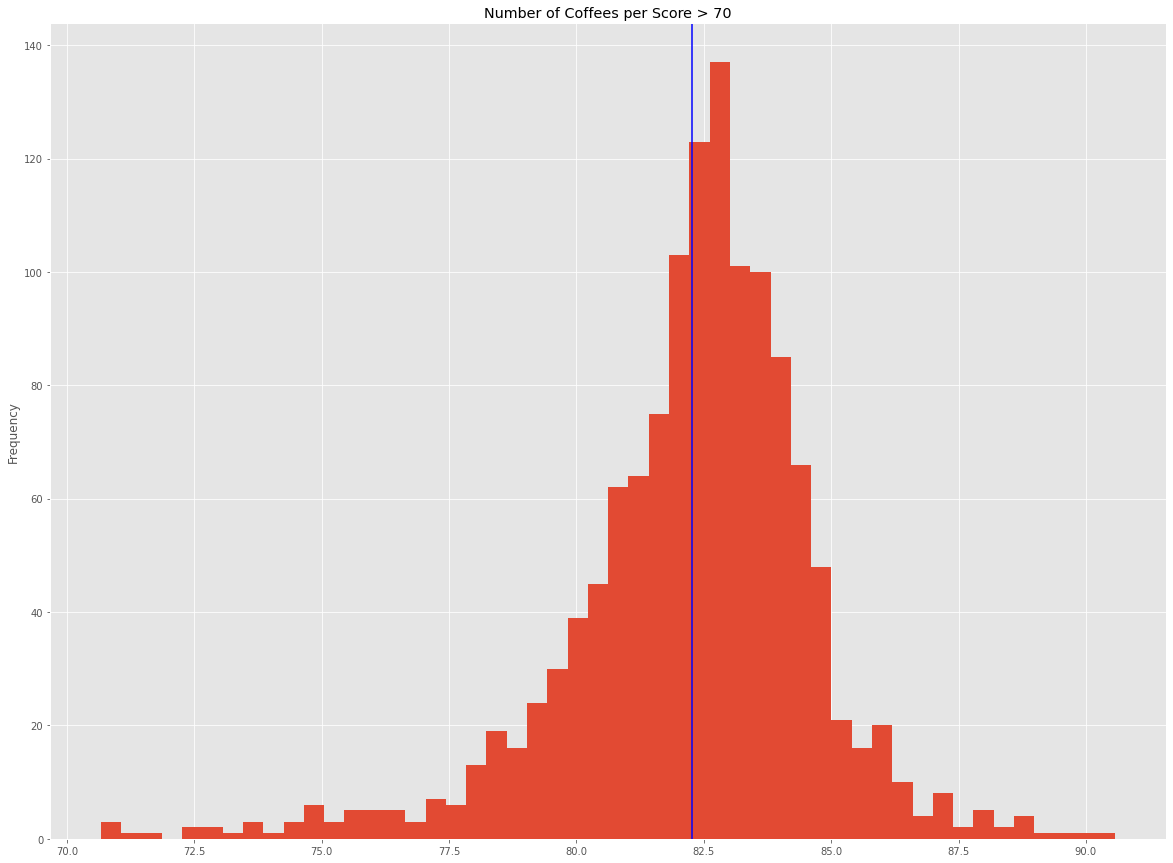

In [14]:
plt.figure(figsize=[20,15], facecolor='white')
grade_variety['Total_Cup_Points'].plot(kind='hist', bins=50, title='Number of Coffees per Score > 70', xlabel='Total Cup Score')
plt.axvline(x=grade_mean, color='blue')
plt.show()

In [15]:
grade_variety['count_variety'] = grade_variety.groupby('Variety')['Total_Cup_Points'].transform('nunique')
grade_df = grade_variety[grade_variety.count_variety >= 10]
grouped_grade_variety = grade_df.loc[:,['Variety', 'Total_Cup_Points']].groupby('Variety').median().sort_values(by='Total_Cup_Points', ascending=False)

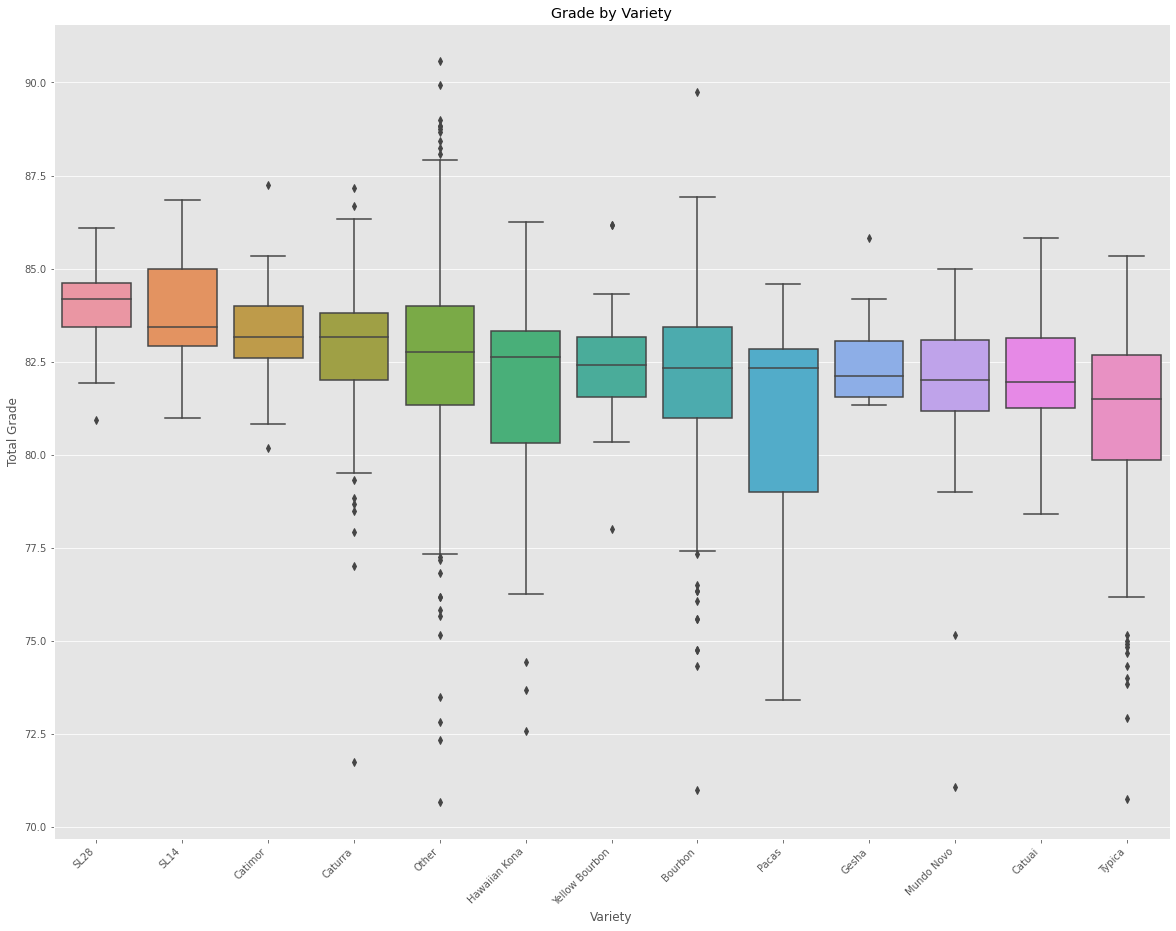

In [16]:
plt.figure(figsize=[20,15], facecolor='white')
sns.boxplot(x='Variety', y='Total_Cup_Points',data=grade_variety, order=grouped_grade_variety.index)
plt.title('Grade by Variety')
plt.xlabel('Variety')
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Total Grade')
#plt.ylim(60, 95)
plt.savefig('grade_by_variety.png')

#### Observations <a class="anchor" id="var_obser"></a>

The box plot shows that all varieties have a similar average cup total. Gesha is known for being one of the best coffees yet its cupping score does not reflect the high qualtity many give it. The top 3 cupping scores are coffees found in east Africa, specificly Kenya, Malawi, and Zimbabwe. Caturra breaks the chain as a primarly South American coffee varietal. The large amount of outliers show how much variance a coffee variety has. This speaks to the organic nature of coffee. 

### Comparing Altitude to Total Cup Score <a class="anchor" id="alt_score"></a>

#### Examining Data <a class="anchor" id="alt_score_eda"></a>

First, I looked at the `altitude_mean_meters` and compared to `altitude` given. Looking at the columns side-by-side reveals that `altitude_mean_meters` already converted from feet to meters. 

In [17]:
uom = coffee_df[['unit_of_measurement','altitude_mean_meters']].groupby(['unit_of_measurement']).count()
uom

,altitude_mean_meters
unit_of_measurement,
ft,111
m,973


In [18]:
alt_ft = coffee_df[(coffee_df['unit_of_measurement'] == 'ft')*(coffee_df['altitude_mean_meters'] > 0)].copy()
alt_ft[['Altitude','altitude_low_meters','altitude_high_meters', 'altitude_mean_meters']]

,Altitude,altitude_low_meters,altitude_high_meters,altitude_mean_meters
14,2000 ft,609.60,609.600,609.600
52,1400ft,426.72,426.720,426.720
58,5000,1524.00,1524.000,1524.000
59,4650,1417.32,1417.320,1417.320
70,5600-5760 metros,1706.88,1755.648,1731.264
...,...,...,...,...
1255,4000 p.s.n.m.,1219.20,1219.200,1219.200
1265,4300,1310.64,1310.640,1310.640
1275,4300,1310.64,1310.640,1310.640
1288,4300,1310.64,1310.640,1310.640


In [19]:
coffee_df[(coffee_df.altitude_mean_meters < 200)*(coffee_df.altitude_mean_meters >= 100)]

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
128,Arabica,松澤宏樹 koju matsuzawa,Japan,ada farm,MCRKPBG 15/16,ada farm,NaN,matsuzawa coffee,170,ada okinawa japan,Taijiro TOKUDA,20,1 kg,Specialty Coffee Institute of Asia,NaN,"November 2nd, 2016",松澤宏樹 Koju Matsuzawa,Mundo Novo,Pulped natural / honey,7.75,7.75,7.75,7.42,8.08,7.83,10.00,10.0,10.0,8.08,84.67,0.12,0,0.0,Green,0,"November 2nd, 2017",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,170.0000,170.0000,170.0000
436,Arabica,exportadora de cafe condor s.a,Colombia,NaN,NaN,trilladora boananza,3-68-0089,exportadora de cafe condor s.a,175,huila,NaN,250,70 kg,Almacafé,2012,"February 22nd, 2012",Exportadora de Cafe Condor S.A,Caturra,Washed / Wet,7.67,7.58,7.58,7.42,7.83,7.58,10.00,10.0,10.0,7.58,83.25,0.12,0,0.0,Green,1,"February 21st, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,175.0000,175.0000,175.0000
443,Arabica,taylor winch (t) ltd,"Tanzania, United Republic Of",mamsera,AA,rafiki (coffee) limited,033/0004,volcafe/taylorwinch tanzania ltd,16.8,moshi,Mamsera,320,60 kg,Tanzanian Coffee Board,2016,"June 20th, 2017",Taylor Winch (T) Ltd,Bourbon,Washed / Wet,7.67,7.58,7.42,7.67,7.67,7.58,10.00,10.0,10.0,7.58,83.17,0.12,0,0.0,Green,3,"June 20th, 2018",Tanzanian Coffee Board,047484d5700c44f033915e632e0c6013d985cd79,127e651fc8b7c35802268599656f2c76bf041b15,m,168.0000,168.0000,168.0000
585,Arabica,juan luis alvarado romero,Guatemala,la esmeralda,11/23/0369,beneficio ixchel,11/23/0369,"unex guatemala, s.a.",518,el progreso,JESUS RAMIREZ,25,69 kg,Asociacion Nacional Del Café,2017,"June 1st, 2017",Juan Luis Alvarado Romero,Bourbon,Washed / Wet,7.58,7.58,7.33,7.58,7.33,7.67,10.00,10.0,10.0,7.67,82.75,0.12,0,0.0,Green,0,"June 1st, 2018",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,157.8864,157.8864,157.8864
596,Arabica,coffee export,Colombia,NaN,NaN,trilladora mercedes,3-201-1817,coffee export,1.65,huila,NaN,275,1 kg,Almacafé,2014,"May 27th, 2014",Coffee Export,Typica,Washed / Wet,7.67,7.42,7.42,7.58,7.33,7.67,10.00,10.0,10.0,7.67,82.75,0.12,0,0.0,Green,0,"May 27th, 2015",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,165.0000,165.0000,165.0000
678,Arabica,juan luis alvarado romero,Guatemala,la esmeralda,11/23/0400,beneficio ixchel,11/23/0400,"unex guatemala, s.a.",518,el progreso,JESUS RAMIREZ,20,69 kg,Asociacion Nacional Del Café,2017,"June 1st, 2017",Juan Luis Alvarado Romero,Bourbon,Washed / Wet,7.58,7.50,7.25,7.67,7.50,7.50,10.00,10.0,10.0,7.42,82.42,0.12,0,0.0,Green,0,"June 1st, 2018",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,157.8864,157.8864,157.8864
834,Arabica,juan luis alvarado romero,Guatemala,la esmeralda,11/23/0634,beneficio ixchel,11/23/0634,"unex guatemala, s.a.",518,oriente,JESUS RAMIREZ,25,69 kg,Asociacion Nacional Del Café,2017,"August 22nd, 2017",Juan Luis Alvarado Romero,Bourbon,Washed / Wet,7.42,7.50,7.25,7.50,7.33,7.42,10.00,10.0,10.0,7.42,81.83,0.10,1,0.0,Green,1,"August 22nd, 2018",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,157.8864,157.8864,157.8864
886,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,mu he zi coffee 木盒子咖啡園,NaN,mu he zi coffee 木盒子咖啡園,NaN,blossom valley宸嶧國際,150 m,changhua baguashan 彰化市八卦山,Zhang ming 

In [20]:
altitude_df = coffee_df[['altitude_mean_meters', 'Total.Cup.Points']].copy().rename(columns={'Total.Cup.Points': 'Total_Cup_Points'})
altitude_df.altitude_mean_meters = altitude_df.altitude_mean_meters.fillna(0).astype('float64')
altitude_df = altitude_df[altitude_df.Total_Cup_Points > 0].reset_index(drop=True).copy()
altitude_df = altitude_df[altitude_df.altitude_mean_meters > 0].reset_index(drop=True).copy()
altitude_df[altitude_df.altitude_mean_meters < 200]

,altitude_mean_meters,Total_Cup_Points
31,12.0000,86.17
32,12.0000,86.17
75,1.0000,85.00
97,170.0000,84.67
222,1.0000,83.83
350,175.0000,83.25
357,168.0000,83.17
392,1.0000,83.08
480,157.8864,82.75
491,165.0000,82.75


In [21]:

altitude_edit_df = altitude_df[altitude_df['altitude_mean_meters'].between(500,2500)]

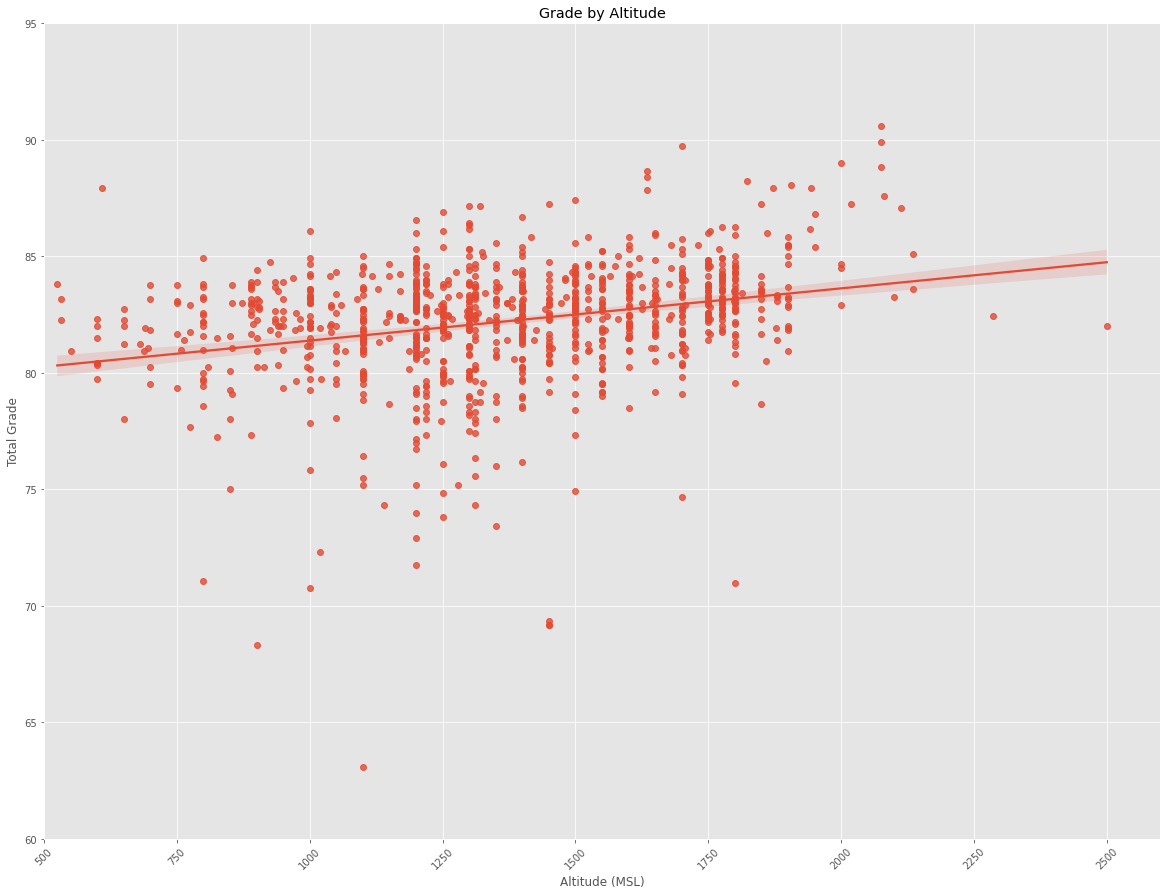

In [22]:
plt.figure(figsize=[20,15], facecolor='white')
sns.regplot(x='altitude_mean_meters',y='Total_Cup_Points', data=altitude_edit_df)
plt.title('Grade by Altitude')
plt.xlabel('Altitude (MSL)')
plt.xticks(rotation = 45)
plt.ylabel('Total Grade')
plt.ylim(60, 95)
plt.xlim(500, 2600)
plt.savefig('grade_by_altitude.png')

In [23]:
grade_variety_alt = coffee_df[['Variety', 'altitude_mean_meters', 'Total.Cup.Points']].copy().rename(columns={'Total.Cup.Points': 'Total_Cup_Points'})
grade_variety_alt.Variety = grade_variety_alt.Variety.fillna('Unknown')
grade_variety_alt.altitude_mean_meters = grade_variety_alt.altitude_mean_meters.fillna(0).astype('float64')
grade_variety_alt = grade_variety_alt[grade_variety_alt['altitude_mean_meters'].between(500,2500)]
print(grade_variety_alt)

      Variety  altitude_mean_meters  Total_Cup_Points
1     Unknown               2075.00             90.58
2       Other               2075.00             89.92
3     Bourbon               1700.00             89.75
4     Unknown               2000.00             89.00
5       Other               2075.00             88.83
...       ...                   ...               ...
1306   Catuai               1450.00             69.17
1307  Bourbon                900.00             68.33
1309  Caturra               1100.00             63.08
1310   Catuai               1417.32             59.83
1312  Caturra               1400.00              0.00

[1006 rows x 3 columns]


In [24]:
grade_variety_alt.corr()

,altitude_mean_meters,Total_Cup_Points
altitude_mean_meters,1.0000,0.1908
Total_Cup_Points,0.1908,1.0000


In [25]:
bourbon_cup_score = grade_variety['Total_Cup_Points'][grade_variety.Variety == 'Bourbon']
typica_cup_score = grade_variety['Total_Cup_Points'][grade_variety.Variety == 'Typica']
caturra_cup_score = grade_variety['Total_Cup_Points'][grade_variety.Variety == 'Caturra']
catuai_cup_score = grade_variety['Total_Cup_Points'][grade_variety.Variety == 'Catuai']

(60.0, 95.0)

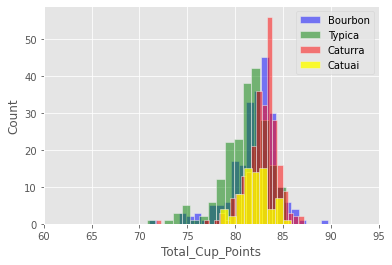

In [26]:
sns.histplot(bourbon_cup_score,color='blue', alpha=.5, label='Bourbon')
sns.histplot(typica_cup_score,color='green', alpha=.5, label='Typica')
sns.histplot(caturra_cup_score,color='red', alpha=.5, label='Caturra')
sns.histplot(catuai_cup_score,color='yellow', alpha=.8, label='Catuai')
plt.legend()
plt.xlim(60, 95)

In [27]:
ratio_1 = np.std(bourbon_cup_score)/np.std(typica_cup_score)
ratio_2 = np.std(bourbon_cup_score)/np.std(caturra_cup_score)
ratio_3 = np.std(bourbon_cup_score)/np.std(catuai_cup_score)
ratio_4 = np.std(typica_cup_score)/np.std(caturra_cup_score)
ratio_5 = np.std(typica_cup_score)/np.std(catuai_cup_score)
ratio_6 = np.std(caturra_cup_score)/np.std(catuai_cup_score)
print("Bourbon over Typica: " + str(ratio_1))
print("Bourbon over Caturra: " + str(ratio_2))
print("Bourbon over Catuai: " + str(ratio_3))
print("Typica over Caturra: " + str(ratio_4))
print("Typica over Catuai: " + str(ratio_5))
print("Caturra over Catuai: " + str(ratio_6))

Bourbon over Typica: 0.9765004208673582
Bourbon over Caturra: 1.3803091260249283
Bourbon over Catuai: 1.5283254870743075
Typica over Caturra: 1.4135264015543327
Typica over Catuai: 1.5651047909603573
Caturra over Catuai: 1.1072342117128813


The ratios show that only Bourbon over Typica are similar enough. Caturra is quite a bit different from all the other coffees.

In [28]:
fstat, pval = f_oneway(bourbon_cup_score, typica_cup_score, catuai_cup_score, caturra_cup_score)
print(pval)

3.777059601751822e-16


Spliting Altitude of varital into bins

In [29]:
top_score = grade_variety_alt[(grade_variety_alt.Variety == 'Bourbon')|(grade_variety_alt.Variety == 'Typica')|(grade_variety_alt.Variety == 'Caturra')|(grade_variety_alt.Variety == 'Catuai')].copy().reset_index()
print(top_score)

     index  Variety  altitude_mean_meters  Total_Cup_Points
0        3  Bourbon               1700.00             89.75
1       22  Caturra               1300.00             87.17
2       26  Bourbon               1250.00             86.92
3       29  Caturra               1400.00             86.67
4       33  Bourbon               1300.00             86.42
..     ...      ...                   ...               ...
670   1306   Catuai               1450.00             69.17
671   1307  Bourbon                900.00             68.33
672   1309  Caturra               1100.00             63.08
673   1310   Catuai               1417.32             59.83
674   1312  Caturra               1400.00              0.00

[675 rows x 4 columns]


In [30]:
tukey = pairwise_tukeyhsd(top_score['Total_Cup_Points'], top_score['Variety'], 0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Bourbon  Catuai  -0.8048 0.5128 -2.3076   0.698  False
Bourbon Caturra   0.1274 0.9891 -0.9109  1.1657  False
Bourbon  Typica  -1.0843 0.0455 -2.1537 -0.0148   True
 Catuai Caturra   0.9323 0.3684 -0.5505  2.4151  False
 Catuai  Typica  -0.2794 0.9639 -1.7842  1.2253  False
Caturra  Typica  -1.2117 0.0149 -2.2528 -0.1706   True
------------------------------------------------------


In [31]:
top_score['altitude_group'] = pd.qcut(grade_variety_alt['altitude_mean_meters'],4)
print(top_score)

     index  Variety  altitude_mean_meters  Total_Cup_Points    altitude_group
0        3  Bourbon               1700.00             89.75               NaN
1       22  Caturra               1300.00             87.17  (1600.0, 2500.0]
2       26  Bourbon               1250.00             86.92  (1600.0, 2500.0]
3       29  Caturra               1400.00             86.67  (1600.0, 2500.0]
4       33  Bourbon               1300.00             86.42  (1600.0, 2500.0]
..     ...      ...                   ...               ...               ...
670   1306   Catuai               1450.00             69.17               NaN
671   1307  Bourbon                900.00             68.33  (1200.0, 1350.0]
672   1309  Caturra               1100.00             63.08  (1600.0, 2500.0]
673   1310   Catuai               1417.32             59.83               NaN
674   1312  Caturra               1400.00              0.00  (1350.0, 1600.0]

[675 rows x 5 columns]


(60.0, 95.0)

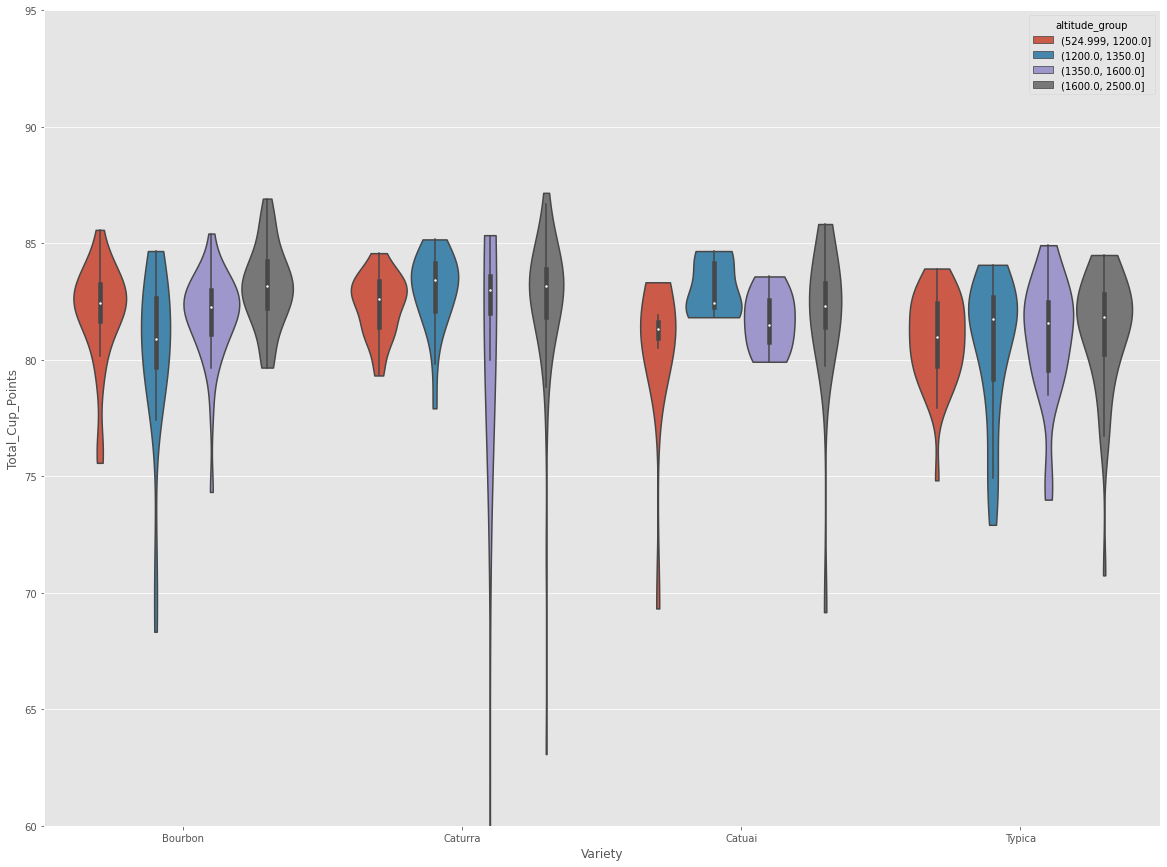

In [32]:
plt.figure(figsize=[20,15], facecolor='white')
sns.violinplot(data=top_score,x='Variety',y='Total_Cup_Points',hue='altitude_group', alpha=.5, cut=0)
plt.ylim(60, 95)